In [1]:
import xarray as xr
import pandas as pd
import numpy as np
import proplot as pplot
import matplotlib.pyplot as plt
import cmaps
import cnmaps
from scipy.stats import linregress
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from pyproj import transform
from cnmaps import get_map, draw_map, clip_contours_by_map
import cartopy.io.shapereader as shpreader
from cartopy.feature import ShapelyFeature

import rioxarray
import geopandas
from shapely.geometry import mapping

import os
os.chdir('/Users/zeqinhuang/Documents/paper/HW_track')

import warnings
warnings.filterwarnings('ignore')

In [2]:
def sel_domain(dataarray):
    try:
        dataarray = dataarray.rename({'longitude':'lon','latitude':'lat'}) # for era5
    except:
        pass
    data_dom = dataarray.sel(lat = slice(35,25),lon = slice(100,122.5)) # for YRB
    return data_dom

In [4]:
T2m_anomalies_YRB_obs_1979_2022 = xr.open_dataarray('data/T2m_5day_running_anomalies_era5_D1_1979_2022_MJJAS.nc')
T2m_anomalies_YRB_obs_1979_2022 = sel_domain(T2m_anomalies_YRB_obs_1979_2022)
JJA = T2m_anomalies_YRB_obs_1979_2022.time.dt.month.isin(range(6,9))
T2m_anomalies_YRB_obs_1979_2022_JJA = T2m_anomalies_YRB_obs_1979_2022.sel(time=JJA)
T2m_anomalies_YRB_obs_2022 = T2m_anomalies_YRB_obs_1979_2022_JJA.sel(time=T2m_anomalies_YRB_obs_1979_2022_JJA.time.dt.year==2022)
weights = np.cos(np.deg2rad(T2m_anomalies_YRB_obs_2022.lat))
weights.name = 'weights'
T2m_anomalies_YRB_obs_2022_weighted = T2m_anomalies_YRB_obs_2022.weighted(weights)
T2m_anomalies_YRB_obs_2022_ts = T2m_anomalies_YRB_obs_2022_weighted.mean(('lon','lat'))

In [25]:
for ds in ['era5','jra55']:
    for d in ['D1','D2','D3']:
        dynamic_t2m_YRB_2022 = xr.open_dataarray('data/dynamic_t2m_2022/dynamic_t2m_' + ds + '_' + d + '_r_5.nc')
        dynamic_t2m_YRB_2022 = sel_domain(dynamic_t2m_YRB_2022)
        weights = np.cos(np.deg2rad(dynamic_t2m_YRB_2022.lat))
        weights.name = 'weights'
        dynamic_t2m_YRB_2022_weighted = dynamic_t2m_YRB_2022.weighted(weights)
        dynamic_t2m_YRB_2022_ts = dynamic_t2m_YRB_2022_weighted.mean(('lon','lat'))
        dynamic_t2m_YRB_2022_ts = dynamic_t2m_YRB_2022_ts.to_numpy()
        dynamic_t2m_YRB_2022_ts = dynamic_t2m_YRB_2022_ts.reshape(20,92)
        if ds == 'era5' and d == 'D1':
            dynamic_t2m_YRB_2022_ts_all_r_5 = dynamic_t2m_YRB_2022_ts
        else:
            dynamic_t2m_YRB_2022_ts_all_r_5 = np.vstack([dynamic_t2m_YRB_2022_ts_all_r_5,dynamic_t2m_YRB_2022_ts])

for ds in ['era5','jra55']:
    for d in ['D1','D2','D3']:
        dynamic_t2m_YRB_2022 = xr.open_dataarray('data/dynamic_t2m_2022/dynamic_t2m_' + ds + '_' + d + '_r_10.nc')
        dynamic_t2m_YRB_2022 = sel_domain(dynamic_t2m_YRB_2022)
        weights = np.cos(np.deg2rad(dynamic_t2m_YRB_2022.lat))
        weights.name = 'weights'
        dynamic_t2m_YRB_2022_weighted = dynamic_t2m_YRB_2022.weighted(weights)
        dynamic_t2m_YRB_2022_ts = dynamic_t2m_YRB_2022_weighted.mean(('lon','lat'))
        dynamic_t2m_YRB_2022_ts = dynamic_t2m_YRB_2022_ts.to_numpy()
        dynamic_t2m_YRB_2022_ts = dynamic_t2m_YRB_2022_ts.reshape(20,92)
        if ds == 'era5' and d == 'D1':
            dynamic_t2m_YRB_2022_ts_all_r_10 = dynamic_t2m_YRB_2022_ts
        else:
            dynamic_t2m_YRB_2022_ts_all_r_10 = np.vstack([dynamic_t2m_YRB_2022_ts_all_r_10,dynamic_t2m_YRB_2022_ts])

for ds in ['era5','jra55']:
    for d in ['D1','D2','D3']:
        dynamic_t2m_YRB_2022 = xr.open_dataarray('data/dynamic_t2m_2022/dynamic_t2m_' + ds + '_' + d + '_r_15.nc')
        dynamic_t2m_YRB_2022 = sel_domain(dynamic_t2m_YRB_2022)
        weights = np.cos(np.deg2rad(dynamic_t2m_YRB_2022.lat))
        weights.name = 'weights'
        dynamic_t2m_YRB_2022_weighted = dynamic_t2m_YRB_2022.weighted(weights)
        dynamic_t2m_YRB_2022_ts = dynamic_t2m_YRB_2022_weighted.mean(('lon','lat'))
        dynamic_t2m_YRB_2022_ts = dynamic_t2m_YRB_2022_ts.to_numpy()
        dynamic_t2m_YRB_2022_ts = dynamic_t2m_YRB_2022_ts.reshape(20,92)
        if ds == 'era5' and d == 'D1':
            dynamic_t2m_YRB_2022_ts_all_r_15 = dynamic_t2m_YRB_2022_ts
        else:
            dynamic_t2m_YRB_2022_ts_all_r_15 = np.vstack([dynamic_t2m_YRB_2022_ts_all_r_15,dynamic_t2m_YRB_2022_ts])
    
for ds in ['era5','jra55']:
    for d in ['D1','D2','D3']:
        dynamic_t2m_YRB_2022 = xr.open_dataarray('data/dynamic_t2m_2022/dynamic_t2m_' + ds + '_' + d + '_r_20.nc')
        dynamic_t2m_YRB_2022 = sel_domain(dynamic_t2m_YRB_2022)
        weights = np.cos(np.deg2rad(dynamic_t2m_YRB_2022.lat))
        weights.name = 'weights'
        dynamic_t2m_YRB_2022_weighted = dynamic_t2m_YRB_2022.weighted(weights)
        dynamic_t2m_YRB_2022_ts = dynamic_t2m_YRB_2022_weighted.mean(('lon','lat'))
        dynamic_t2m_YRB_2022_ts = dynamic_t2m_YRB_2022_ts.to_numpy()
        dynamic_t2m_YRB_2022_ts = dynamic_t2m_YRB_2022_ts.reshape(20,92)
        if ds == 'era5' and d == 'D1':
            dynamic_t2m_YRB_2022_ts_all_r_20 = dynamic_t2m_YRB_2022_ts
        else:
            dynamic_t2m_YRB_2022_ts_all_r_20 = np.vstack([dynamic_t2m_YRB_2022_ts_all_r_20,dynamic_t2m_YRB_2022_ts])

for ds in ['era5','jra55']:
    for d in ['D1','D2','D3']:
        dynamic_t2m_YRB_2022 = xr.open_dataarray('data/dynamic_t2m_2022/dynamic_t2m_' + ds + '_' + d + '_r_25.nc')
        dynamic_t2m_YRB_2022 = sel_domain(dynamic_t2m_YRB_2022)
        weights = np.cos(np.deg2rad(dynamic_t2m_YRB_2022.lat))
        weights.name = 'weights'
        dynamic_t2m_YRB_2022_weighted = dynamic_t2m_YRB_2022.weighted(weights)
        dynamic_t2m_YRB_2022_ts = dynamic_t2m_YRB_2022_weighted.mean(('lon','lat'))
        dynamic_t2m_YRB_2022_ts = dynamic_t2m_YRB_2022_ts.to_numpy()
        dynamic_t2m_YRB_2022_ts = dynamic_t2m_YRB_2022_ts.reshape(20,92)
        if ds == 'era5' and d == 'D1':
            dynamic_t2m_YRB_2022_ts_all_r_25 = dynamic_t2m_YRB_2022_ts
        else:
            dynamic_t2m_YRB_2022_ts_all_r_25 = np.vstack([dynamic_t2m_YRB_2022_ts_all_r_25,dynamic_t2m_YRB_2022_ts])


<AxesSubplot:xlabel='time'>

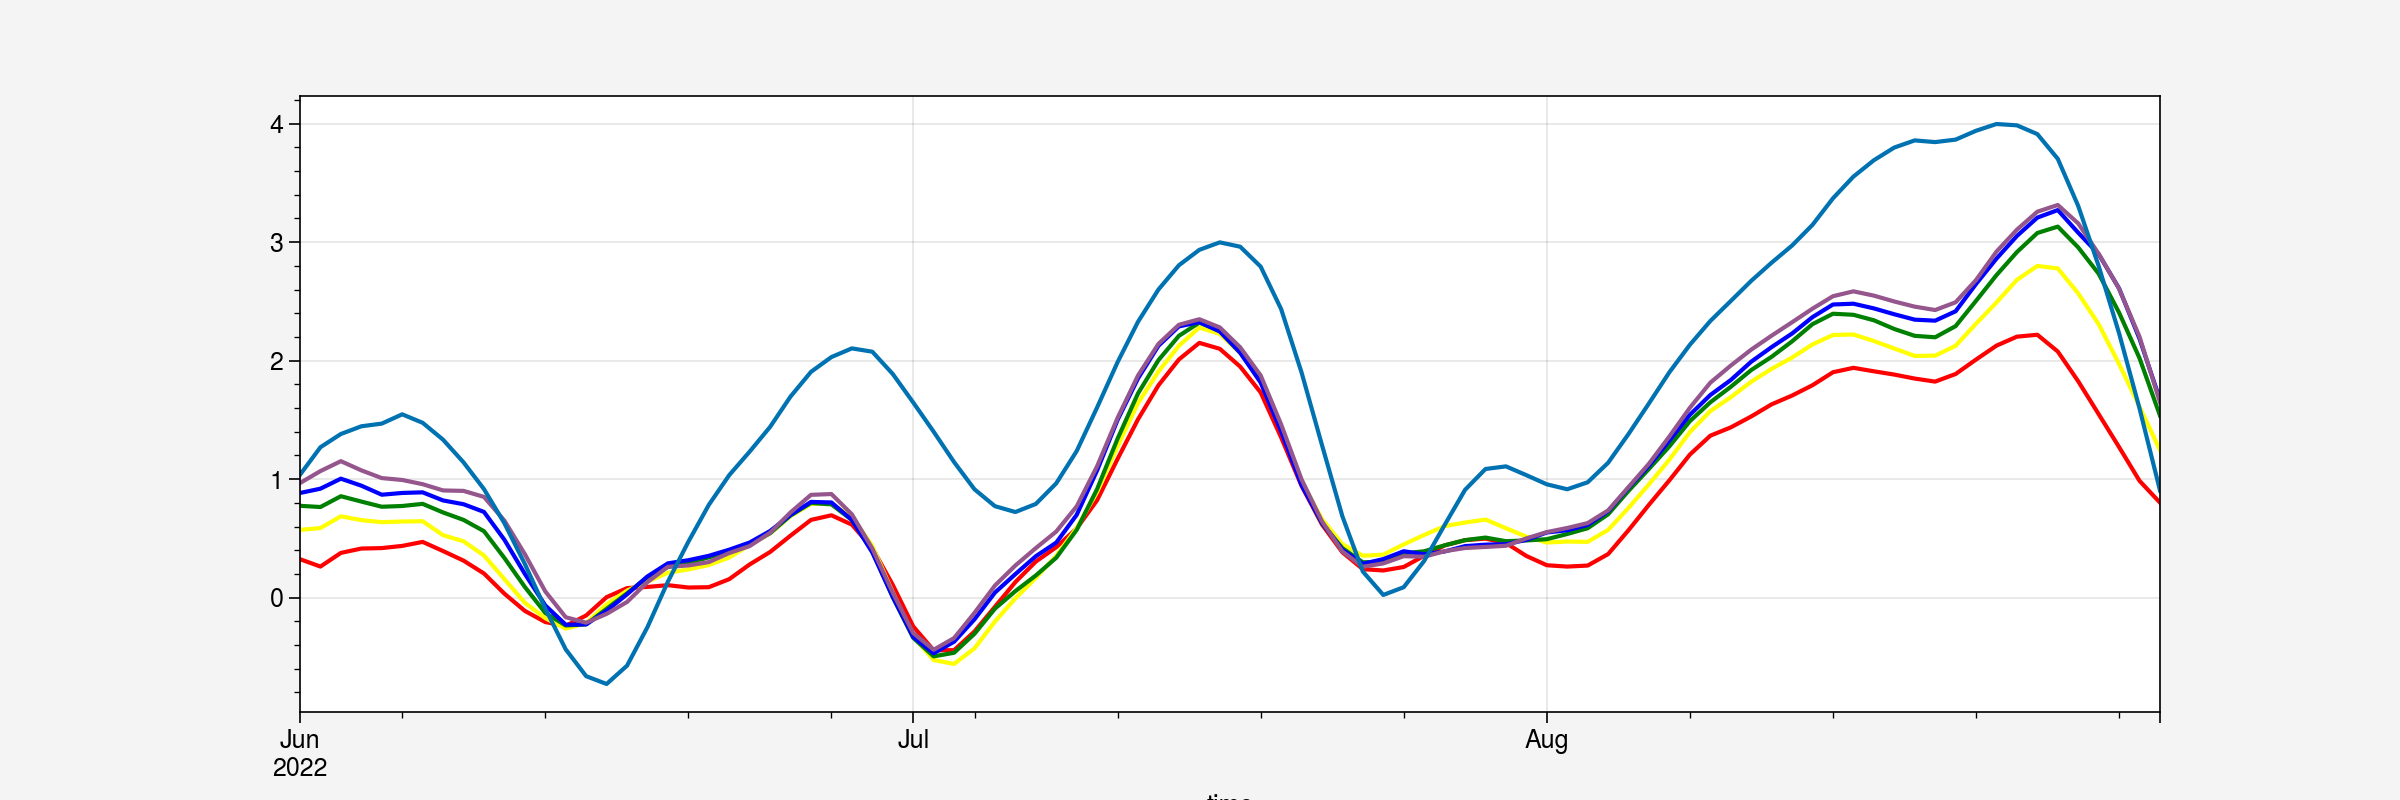

In [26]:
fig = plt.figure(figsize = (12,4))
dynamic_t2m_YRB_2022_ts_all_r_5 = pd.DataFrame(dynamic_t2m_YRB_2022_ts_all_r_5.transpose())
dynamic_t2m_YRB_2022_ts_all_r_5.index = T2m_anomalies_YRB_obs_2022_ts.time
dynamic_t2m_YRB_2022_ts_all_r_5.mean(axis=1).rolling(5,min_periods=1).mean().plot(color='red')
dynamic_t2m_YRB_2022_ts_all_r_10 = pd.DataFrame(dynamic_t2m_YRB_2022_ts_all_r_10.transpose())
dynamic_t2m_YRB_2022_ts_all_r_10.index = T2m_anomalies_YRB_obs_2022_ts.time
dynamic_t2m_YRB_2022_ts_all_r_10.mean(axis=1).rolling(5,min_periods=1).mean().plot(color='yellow')
dynamic_t2m_YRB_2022_ts_all_r_15 = pd.DataFrame(dynamic_t2m_YRB_2022_ts_all_r_15.transpose())
dynamic_t2m_YRB_2022_ts_all_r_15.index = T2m_anomalies_YRB_obs_2022_ts.time
dynamic_t2m_YRB_2022_ts_all_r_15.mean(axis=1).rolling(5,min_periods=1).mean().plot(color='green')
dynamic_t2m_YRB_2022_ts_all_r_20 = pd.DataFrame(dynamic_t2m_YRB_2022_ts_all_r_20.transpose())
dynamic_t2m_YRB_2022_ts_all_r_20.index = T2m_anomalies_YRB_obs_2022_ts.time
dynamic_t2m_YRB_2022_ts_all_r_20.mean(axis=1).rolling(5,min_periods=1).mean().plot(color='blue')
dynamic_t2m_YRB_2022_ts_all_r_25 = pd.DataFrame(dynamic_t2m_YRB_2022_ts_all_r_25.transpose())
dynamic_t2m_YRB_2022_ts_all_r_25.index = T2m_anomalies_YRB_obs_2022_ts.time
dynamic_t2m_YRB_2022_ts_all_r_25.mean(axis=1).rolling(5,min_periods=1).mean().plot(color='purple')
T2m_anomalies_YRB_obs_2022_ts.to_series().rolling(5,min_periods=1).mean().plot()

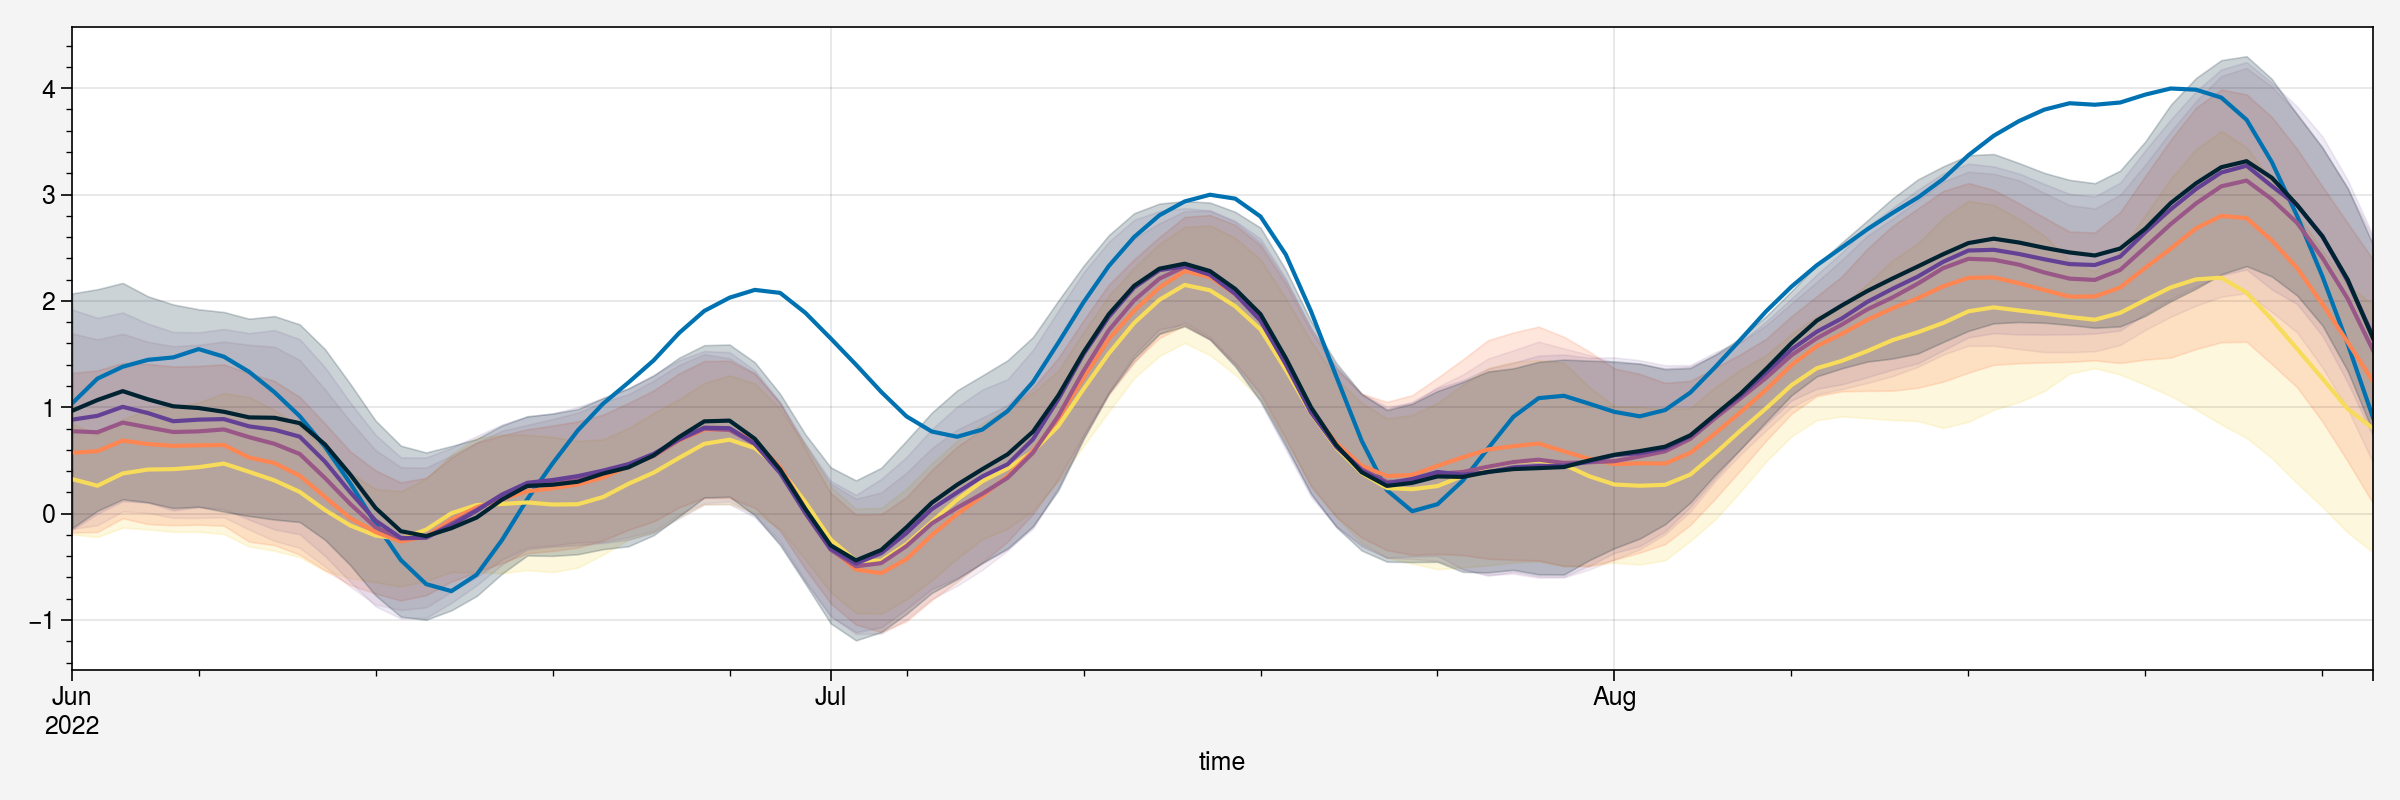

In [48]:
fig = plt.figure(figsize = (12,4))
ax = T2m_anomalies_YRB_obs_2022_ts.to_series().rolling(5,min_periods=1).mean().plot()
dynamic_t2m_YRB_2022_ts_all_r_5_mean = dynamic_t2m_YRB_2022_ts_all_r_5.mean(axis=1).rolling(5,min_periods=1).mean()
dynamic_t2m_YRB_2022_ts_all_r_5_std = dynamic_t2m_YRB_2022_ts_all_r_5.std(axis=1).rolling(5,min_periods=1).mean()
dynamic_t2m_YRB_2022_ts_all_r_5_upper = dynamic_t2m_YRB_2022_ts_all_r_5_mean + dynamic_t2m_YRB_2022_ts_all_r_5_std
dynamic_t2m_YRB_2022_ts_all_r_5_lower = dynamic_t2m_YRB_2022_ts_all_r_5_mean - dynamic_t2m_YRB_2022_ts_all_r_5_std
dynamic_t2m_YRB_2022_ts_all_r_5_mean.plot(ax = ax,color='#f7db5a')
ax.fill_between(x=dynamic_t2m_YRB_2022_ts_all_r_5_std.index,y1=dynamic_t2m_YRB_2022_ts_all_r_5_lower,y2=dynamic_t2m_YRB_2022_ts_all_r_5_upper,color='#f7db5a',alpha=0.2)

dynamic_t2m_YRB_2022_ts_all_r_10_mean = dynamic_t2m_YRB_2022_ts_all_r_10.mean(axis=1).rolling(5,min_periods=1).mean()
dynamic_t2m_YRB_2022_ts_all_r_10_std = dynamic_t2m_YRB_2022_ts_all_r_10.std(axis=1).rolling(5,min_periods=1).mean()
dynamic_t2m_YRB_2022_ts_all_r_10_upper = dynamic_t2m_YRB_2022_ts_all_r_10_mean + dynamic_t2m_YRB_2022_ts_all_r_10_std
dynamic_t2m_YRB_2022_ts_all_r_10_lower = dynamic_t2m_YRB_2022_ts_all_r_10_mean - dynamic_t2m_YRB_2022_ts_all_r_10_std
dynamic_t2m_YRB_2022_ts_all_r_10_mean.plot(ax = ax,color='#fd8652')
ax.fill_between(x=dynamic_t2m_YRB_2022_ts_all_r_10_std.index,y1=dynamic_t2m_YRB_2022_ts_all_r_10_lower,y2=dynamic_t2m_YRB_2022_ts_all_r_10_upper,color='#fd8652',alpha=0.2)

dynamic_t2m_YRB_2022_ts_all_r_15_mean = dynamic_t2m_YRB_2022_ts_all_r_15.mean(axis=1).rolling(5,min_periods=1).mean()
dynamic_t2m_YRB_2022_ts_all_r_15_std = dynamic_t2m_YRB_2022_ts_all_r_15.std(axis=1).rolling(5,min_periods=1).mean()
dynamic_t2m_YRB_2022_ts_all_r_15_upper = dynamic_t2m_YRB_2022_ts_all_r_15_mean + dynamic_t2m_YRB_2022_ts_all_r_15_std
dynamic_t2m_YRB_2022_ts_all_r_15_lower = dynamic_t2m_YRB_2022_ts_all_r_15_mean - dynamic_t2m_YRB_2022_ts_all_r_15_std
dynamic_t2m_YRB_2022_ts_all_r_15_mean.plot(ax = ax,color='#995788')
ax.fill_between(x=dynamic_t2m_YRB_2022_ts_all_r_15_std.index,y1=dynamic_t2m_YRB_2022_ts_all_r_15_lower,y2=dynamic_t2m_YRB_2022_ts_all_r_15_upper,color='#995788',alpha=0.1)

dynamic_t2m_YRB_2022_ts_all_r_20_mean = dynamic_t2m_YRB_2022_ts_all_r_20.mean(axis=1).rolling(5,min_periods=1).mean()
dynamic_t2m_YRB_2022_ts_all_r_20_std = dynamic_t2m_YRB_2022_ts_all_r_20.std(axis=1).rolling(5,min_periods=1).mean()
dynamic_t2m_YRB_2022_ts_all_r_20_upper = dynamic_t2m_YRB_2022_ts_all_r_20_mean + dynamic_t2m_YRB_2022_ts_all_r_20_std
dynamic_t2m_YRB_2022_ts_all_r_20_lower = dynamic_t2m_YRB_2022_ts_all_r_20_mean - dynamic_t2m_YRB_2022_ts_all_r_20_std
dynamic_t2m_YRB_2022_ts_all_r_20_mean.plot(ax = ax,color='#644195')
ax.fill_between(x=dynamic_t2m_YRB_2022_ts_all_r_20_std.index,y1=dynamic_t2m_YRB_2022_ts_all_r_20_lower,y2=dynamic_t2m_YRB_2022_ts_all_r_20_upper,color='#644195',alpha=0.1)

dynamic_t2m_YRB_2522_ts_all_r_25_mean = dynamic_t2m_YRB_2022_ts_all_r_25.mean(axis=1).rolling(5,min_periods=1).mean()
dynamic_t2m_YRB_2522_ts_all_r_25_std = dynamic_t2m_YRB_2022_ts_all_r_25.std(axis=1).rolling(5,min_periods=1).mean()
dynamic_t2m_YRB_2522_ts_all_r_25_upper = dynamic_t2m_YRB_2522_ts_all_r_25_mean + dynamic_t2m_YRB_2522_ts_all_r_25_std
dynamic_t2m_YRB_2522_ts_all_r_25_lower = dynamic_t2m_YRB_2522_ts_all_r_25_mean - dynamic_t2m_YRB_2522_ts_all_r_25_std
dynamic_t2m_YRB_2522_ts_all_r_25_mean.plot(ax = ax,color='#002332')
ax.fill_between(x=dynamic_t2m_YRB_2522_ts_all_r_25_std.index,y1=dynamic_t2m_YRB_2522_ts_all_r_25_lower,y2=dynamic_t2m_YRB_2522_ts_all_r_25_upper,color='#002332',alpha=0.2)

plt.tight_layout()


In [53]:
analog_nums = [5,10,15,20,25]
analog_num_dfs = {}

for analog_num in analog_nums:
    # calculate summer historical constructed analogue time series 
    dynamic_t2m_ano_D1 = xr.open_dataarray('data/dynamic_t2m_historical/dynamic_t2m_era5_' + 'D1' + '_N_' + str(analog_num) + '.nc')
    dynamic_t2m_ano_D2 = xr.open_dataarray('data/dynamic_t2m_historical/dynamic_t2m_era5_' + 'D2' + '_N_' + str(analog_num) + '.nc')
    dynamic_t2m_ano_D3 = xr.open_dataarray('data/dynamic_t2m_historical/dynamic_t2m_era5_' + 'D3' + '_N_' + str(analog_num) + '.nc')
    new_lon = dynamic_t2m_ano_D1.lon
    new_lat = dynamic_t2m_ano_D1.lat
    target_shape = dynamic_t2m_ano_D1.shape
    dynamic_t2m_ano_D2_new = np.empty(target_shape[1:])
    dynamic_t2m_ano_D3_new = np.empty(target_shape[1:])

    for i in range(target_shape[0]):
        dynamic_t2m_ano_D2_new[:,:,:,5:36,10:71] = dynamic_t2m_ano_D2.values[i]
        dynamic_t2m_ano_D2_new = xr.DataArray(
            data=dynamic_t2m_ano_D2_new,
            coords=[dynamic_t2m_ano_D1.dist_func,dynamic_t2m_ano_D1.every_other_5day,dynamic_t2m_ano_D1.target_time,dynamic_t2m_ano_D1.lat,dynamic_t2m_ano_D1.lon],
            dims = ['dist_func','every_other_5day','target_time','lat','lon'])
        dynamic_t2m_ano_D3_new[:,:,:,10:31,20:61] = dynamic_t2m_ano_D3.values[i]
        dynamic_t2m_ano_D3_new = xr.DataArray(
            data=dynamic_t2m_ano_D3_new,
            coords=[dynamic_t2m_ano_D1.dist_func,dynamic_t2m_ano_D1.every_other_5day,dynamic_t2m_ano_D1.target_time,dynamic_t2m_ano_D1.lat,dynamic_t2m_ano_D1.lon],
            dims = ['dist_func','every_other_5day','target_time','lat','lon'])

        dynamic_t2m_ano_all = np.empty((target_shape[1]*target_shape[2]*3,) + target_shape[-3:])
        dynamic_t2m_ano_all[:20] = dynamic_t2m_ano_D1.values[i].reshape((20,)+target_shape[-3:])
        dynamic_t2m_ano_all[20:40] = dynamic_t2m_ano_D2_new.values.reshape((20,)+target_shape[-3:])
        dynamic_t2m_ano_all[40:] = dynamic_t2m_ano_D3_new.values.reshape((20,)+target_shape[-3:])
        schemes = range(target_shape[1]*target_shape[2]*3)
        dynamic_t2m_ano_all = xr.DataArray(
            data=dynamic_t2m_ano_all,
            coords=[schemes,dynamic_t2m_ano_D1.target_time,dynamic_t2m_ano_D1.lat,dynamic_t2m_ano_D1.lon],
            dims = ['schemes','target_time','lat','lon'])

        dynamic_t2m_ano_all = dynamic_t2m_ano_all.sel(lat = slice(35,25),lon = slice(100,122.5))
        weights = np.cos(np.deg2rad(dynamic_t2m_ano_all.lat))
        weights.name = 'weights'
        dynamic_t2m_ano_all_weighted = dynamic_t2m_ano_all.weighted(weights)
        dynamic_t2m_ano_all_weighted_ts = dynamic_t2m_ano_all_weighted.mean(('lon','lat'))
        dynamic_t2m_ano_all_weighted_ts_daily = dynamic_t2m_ano_all_weighted_ts
        dynamic_t2m_ano_all_weighted_ts = dynamic_t2m_ano_all_weighted_ts.mean(axis=1)
        dynamic_t2m_ano_all_weighted_ts = dynamic_t2m_ano_all_weighted_ts.expand_dims(dim={'time':1}, axis=1)
        if i == 0:
            dynamic_t2m_ano_all_weighted_ts_all_era5 = dynamic_t2m_ano_all_weighted_ts
            dynamic_t2m_ano_all_weighted_ts_daily_all_era5 = dynamic_t2m_ano_all_weighted_ts_daily
        else:
            dynamic_t2m_ano_all_weighted_ts_all_era5 = xr.concat([dynamic_t2m_ano_all_weighted_ts_all_era5, dynamic_t2m_ano_all_weighted_ts],dim='time')
            dynamic_t2m_ano_all_weighted_ts_daily_all_era5 = xr.concat([dynamic_t2m_ano_all_weighted_ts_daily_all_era5,dynamic_t2m_ano_all_weighted_ts_daily],dim='target_time')

    # calculate summer historical constructed analogue time series 
    dynamic_t2m_ano_D1 = xr.open_dataarray('data/dynamic_t2m_historical/dynamic_t2m_jra55_' + 'D1' + '_N_' + str(analog_num) + '.nc')
    dynamic_t2m_ano_D2 = xr.open_dataarray('data/dynamic_t2m_historical/dynamic_t2m_jra55_' + 'D2' + '_N_' + str(analog_num) + '.nc')
    dynamic_t2m_ano_D3 = xr.open_dataarray('data/dynamic_t2m_historical/dynamic_t2m_jra55_' + 'D3' + '_N_' + str(analog_num) + '.nc')
    new_lon = dynamic_t2m_ano_D1.lon
    new_lat = dynamic_t2m_ano_D1.lat
    target_shape = dynamic_t2m_ano_D1.shape
    dynamic_t2m_ano_D2_new = np.empty(target_shape[1:])
    dynamic_t2m_ano_D3_new = np.empty(target_shape[1:])

    for i in range(target_shape[0]):
        dynamic_t2m_ano_D2_new[:,:,:,4:29,8:57] = dynamic_t2m_ano_D2.values[i]
        dynamic_t2m_ano_D2_new = xr.DataArray(
            data=dynamic_t2m_ano_D2_new,
            coords=[dynamic_t2m_ano_D1.dist_func,dynamic_t2m_ano_D1.every_other_5day,dynamic_t2m_ano_D1.target_time,dynamic_t2m_ano_D1.lat,dynamic_t2m_ano_D1.lon],
            dims = ['dist_func','every_other_5day','target_time','lat','lon'])
        dynamic_t2m_ano_D3_new[:,:,:,8:25,16:49] = dynamic_t2m_ano_D3.values[i]
        dynamic_t2m_ano_D3_new = xr.DataArray(
            data=dynamic_t2m_ano_D3_new,
            coords=[dynamic_t2m_ano_D1.dist_func,dynamic_t2m_ano_D1.every_other_5day,dynamic_t2m_ano_D1.target_time,dynamic_t2m_ano_D1.lat,dynamic_t2m_ano_D1.lon],
            dims = ['dist_func','every_other_5day','target_time','lat','lon'])

        dynamic_t2m_ano_all = np.empty((target_shape[1]*target_shape[2]*3,) + target_shape[-3:])
        dynamic_t2m_ano_all[:20] = dynamic_t2m_ano_D1.values[i].reshape((20,)+target_shape[-3:])
        dynamic_t2m_ano_all[20:40] = dynamic_t2m_ano_D2_new.values.reshape((20,)+target_shape[-3:])
        dynamic_t2m_ano_all[40:] = dynamic_t2m_ano_D3_new.values.reshape((20,)+target_shape[-3:])
        schemes = range(target_shape[1]*target_shape[2]*3)
        dynamic_t2m_ano_all = xr.DataArray(
            data=dynamic_t2m_ano_all,
            coords=[schemes,dynamic_t2m_ano_D1.target_time,dynamic_t2m_ano_D1.lat,dynamic_t2m_ano_D1.lon],
            dims = ['schemes','target_time','lat','lon'])

        dynamic_t2m_ano_all = dynamic_t2m_ano_all.sel(lat = slice(35,25),lon = slice(100,122.5))
        weights = np.cos(np.deg2rad(dynamic_t2m_ano_all.lat))
        weights.name = 'weights'
        dynamic_t2m_ano_all_weighted = dynamic_t2m_ano_all.weighted(weights)
        dynamic_t2m_ano_all_weighted_ts = dynamic_t2m_ano_all_weighted.mean(('lon','lat'))
        dynamic_t2m_ano_all_weighted_ts_daily = dynamic_t2m_ano_all_weighted_ts
        dynamic_t2m_ano_all_weighted_ts = dynamic_t2m_ano_all_weighted_ts.mean(axis=1)
        dynamic_t2m_ano_all_weighted_ts = dynamic_t2m_ano_all_weighted_ts.expand_dims(dim={'time':1}, axis=1)
        if i == 0:
            dynamic_t2m_ano_all_weighted_ts_all_jra55 = dynamic_t2m_ano_all_weighted_ts
            dynamic_t2m_ano_all_weighted_ts_daily_all_jra55 = dynamic_t2m_ano_all_weighted_ts_daily
        else:
            dynamic_t2m_ano_all_weighted_ts_all_jra55 = xr.concat([dynamic_t2m_ano_all_weighted_ts_all_jra55, dynamic_t2m_ano_all_weighted_ts],dim='time')
            dynamic_t2m_ano_all_weighted_ts_daily_all_jra55 = xr.concat([dynamic_t2m_ano_all_weighted_ts_daily_all_jra55,dynamic_t2m_ano_all_weighted_ts_daily],dim='target_time')

    dynamic_t2m_ano_all_weighted_ts_all = xr.concat([dynamic_t2m_ano_all_weighted_ts_all_era5,dynamic_t2m_ano_all_weighted_ts_all_jra55],dim='schemes')
    dynamic_t2m_ano_all_weighted_ts_daily_all_era5['target_time'] = dynamic_t2m_ano_all_weighted_ts_daily_all_jra55['target_time']
    dynamic_t2m_ano_all_weighted_ts_daily_all = xr.concat([dynamic_t2m_ano_all_weighted_ts_daily_all_era5,dynamic_t2m_ano_all_weighted_ts_daily_all_jra55],dim='schemes')
    df = pd.DataFrame(dynamic_t2m_ano_all_weighted_ts_all.values.transpose())
    analog_num_dfs['N'+str(analog_num)] = df

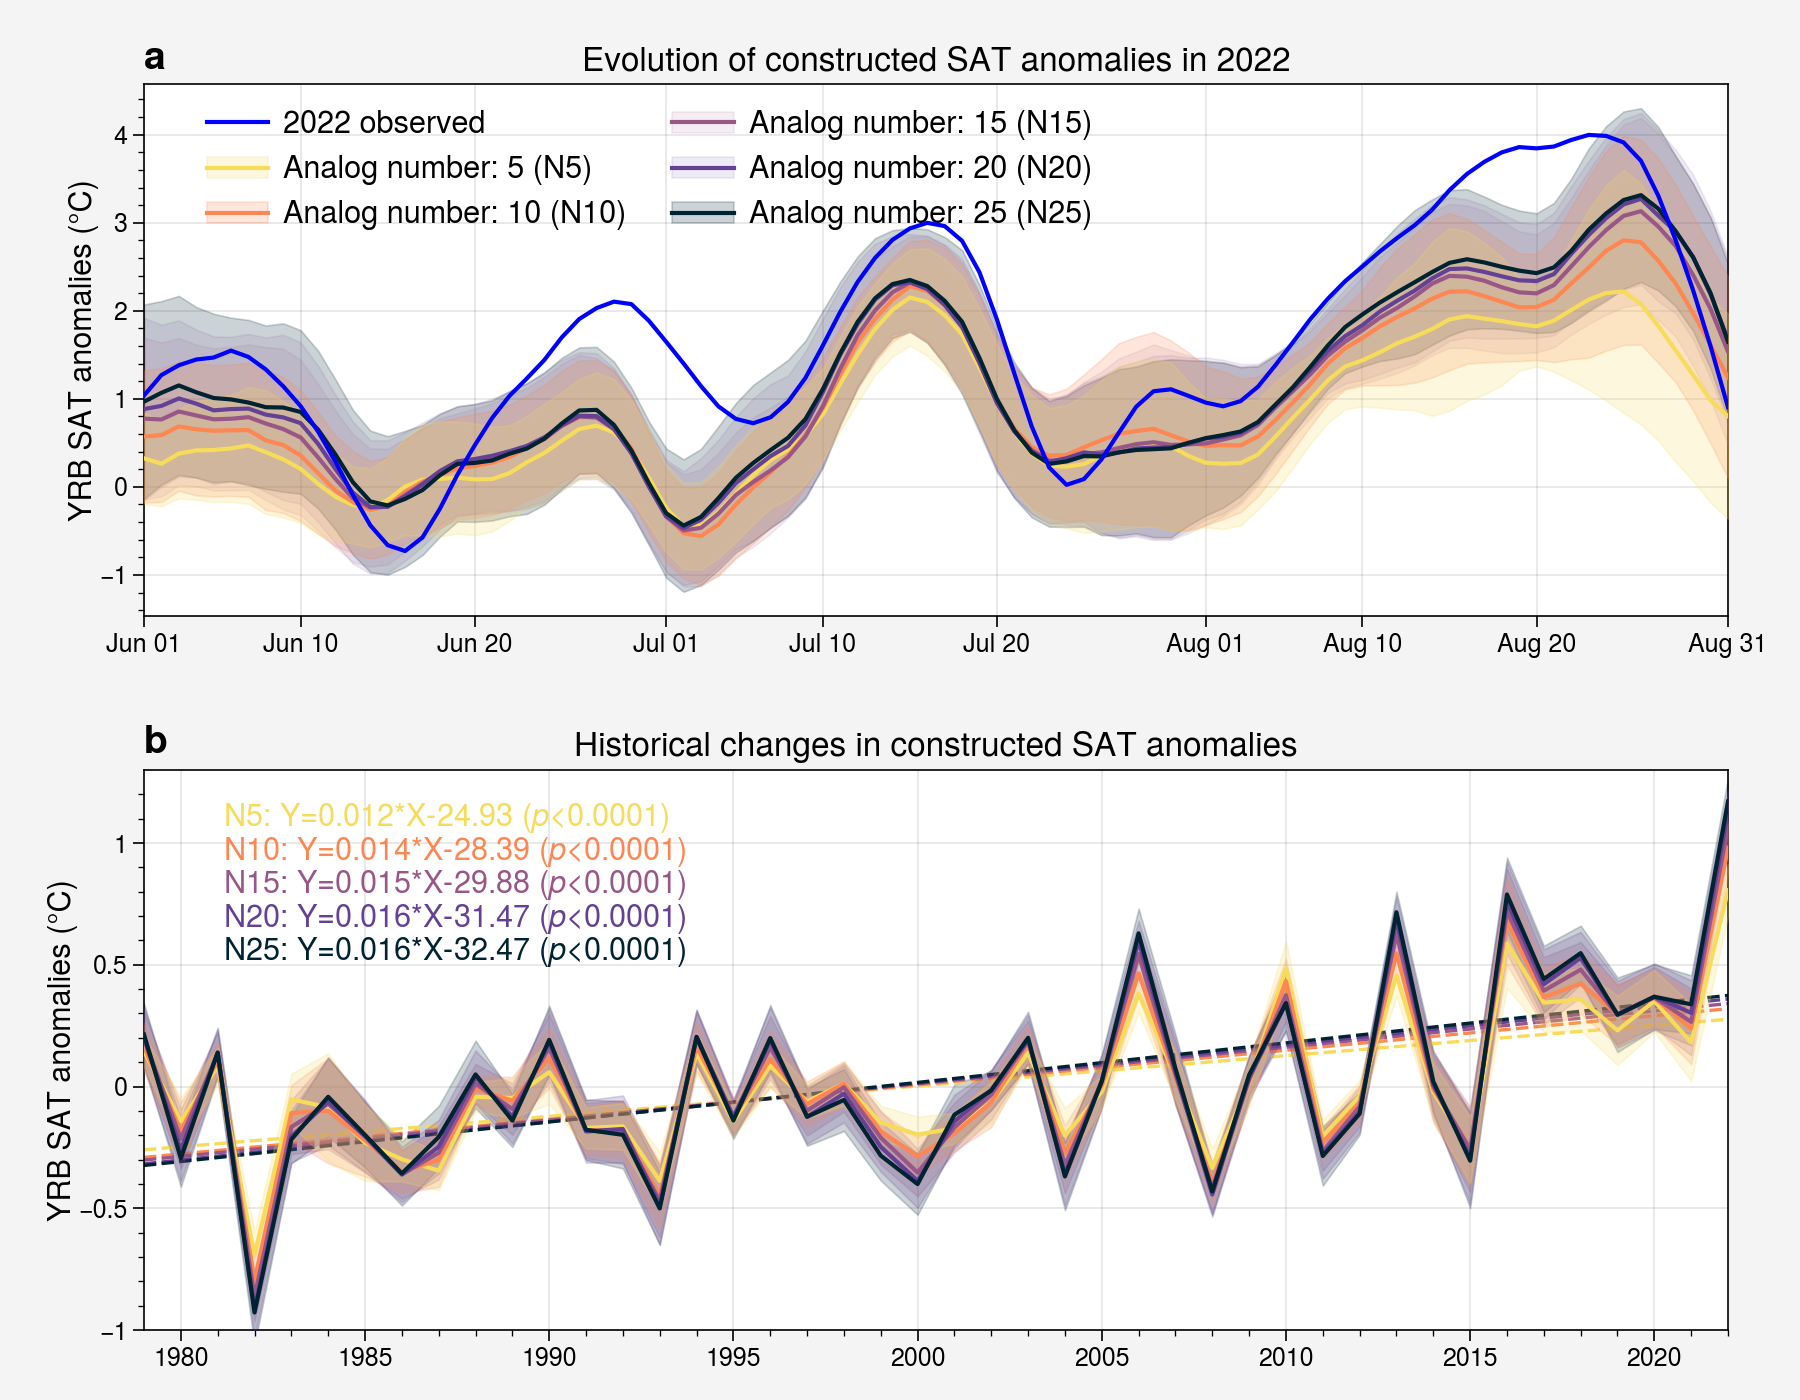

In [112]:
axes_locs = [
    [0.08,0.56,0.88,0.38],
    [0.08,0.05,0.88,0.4],
]
analog_num_colors = ['#f7db5a','#fd8652','#995788','#644195','#002332']
def add_panel_label(ax, label, x = -0.1, y = 1):
    ax.text(x, y, label, transform=ax.transAxes,
      fontsize=14, fontweight='bold', va='top', ha='left')

fig = plt.figure(figsize = (9,7))
ax1 = fig.add_axes(axes_locs[0])
T2m_anomalies_YRB_obs_2022_ts0 = T2m_anomalies_YRB_obs_2022_ts.to_series().rolling(5,min_periods=1).mean()
p0 = ax1.plot(T2m_anomalies_YRB_obs_2022_ts0.index,T2m_anomalies_YRB_obs_2022_ts0,color='blue',linewidth=1.5,zorder=10)
dynamic_t2m_YRB_2022_ts_all_r_5_mean = dynamic_t2m_YRB_2022_ts_all_r_5.mean(axis=1).rolling(5,min_periods=1).mean()
dynamic_t2m_YRB_2022_ts_all_r_5_std = dynamic_t2m_YRB_2022_ts_all_r_5.std(axis=1).rolling(5,min_periods=1).mean()
dynamic_t2m_YRB_2022_ts_all_r_5_upper = dynamic_t2m_YRB_2022_ts_all_r_5_mean + dynamic_t2m_YRB_2022_ts_all_r_5_std
dynamic_t2m_YRB_2022_ts_all_r_5_lower = dynamic_t2m_YRB_2022_ts_all_r_5_mean - dynamic_t2m_YRB_2022_ts_all_r_5_std
l1 = ax1.plot(dynamic_t2m_YRB_2022_ts_all_r_5_mean,color=analog_num_colors[0],zorder=6)
fb1 = ax1.fill_between(x=dynamic_t2m_YRB_2022_ts_all_r_5_std.index,y1=dynamic_t2m_YRB_2022_ts_all_r_5_lower,y2=dynamic_t2m_YRB_2022_ts_all_r_5_upper,color=analog_num_colors[0],alpha=0.2,zorder=5)

dynamic_t2m_YRB_2022_ts_all_r_10_mean = dynamic_t2m_YRB_2022_ts_all_r_10.mean(axis=1).rolling(5,min_periods=1).mean()
dynamic_t2m_YRB_2022_ts_all_r_10_std = dynamic_t2m_YRB_2022_ts_all_r_10.std(axis=1).rolling(5,min_periods=1).mean()
dynamic_t2m_YRB_2022_ts_all_r_10_upper = dynamic_t2m_YRB_2022_ts_all_r_10_mean + dynamic_t2m_YRB_2022_ts_all_r_10_std
dynamic_t2m_YRB_2022_ts_all_r_10_lower = dynamic_t2m_YRB_2022_ts_all_r_10_mean - dynamic_t2m_YRB_2022_ts_all_r_10_std
l2 = ax1.plot(dynamic_t2m_YRB_2022_ts_all_r_10_mean,color=analog_num_colors[1],zorder=6)
fb2 = ax1.fill_between(x=dynamic_t2m_YRB_2022_ts_all_r_10_std.index,y1=dynamic_t2m_YRB_2022_ts_all_r_10_lower,y2=dynamic_t2m_YRB_2022_ts_all_r_10_upper,color=analog_num_colors[1],alpha=0.2,zorder=4)

dynamic_t2m_YRB_2022_ts_all_r_15_mean = dynamic_t2m_YRB_2022_ts_all_r_15.mean(axis=1).rolling(5,min_periods=1).mean()
dynamic_t2m_YRB_2022_ts_all_r_15_std = dynamic_t2m_YRB_2022_ts_all_r_15.std(axis=1).rolling(5,min_periods=1).mean()
dynamic_t2m_YRB_2022_ts_all_r_15_upper = dynamic_t2m_YRB_2022_ts_all_r_15_mean + dynamic_t2m_YRB_2022_ts_all_r_15_std
dynamic_t2m_YRB_2022_ts_all_r_15_lower = dynamic_t2m_YRB_2022_ts_all_r_15_mean - dynamic_t2m_YRB_2022_ts_all_r_15_std
l3 = ax1.plot(dynamic_t2m_YRB_2022_ts_all_r_15_mean,color=analog_num_colors[2],zorder=6)
fb3 = ax1.fill_between(x=dynamic_t2m_YRB_2022_ts_all_r_15_std.index,y1=dynamic_t2m_YRB_2022_ts_all_r_15_lower,y2=dynamic_t2m_YRB_2022_ts_all_r_15_upper,color=analog_num_colors[2],alpha=0.1,zorder=3)

dynamic_t2m_YRB_2022_ts_all_r_20_mean = dynamic_t2m_YRB_2022_ts_all_r_20.mean(axis=1).rolling(5,min_periods=1).mean()
dynamic_t2m_YRB_2022_ts_all_r_20_std = dynamic_t2m_YRB_2022_ts_all_r_20.std(axis=1).rolling(5,min_periods=1).mean()
dynamic_t2m_YRB_2022_ts_all_r_20_upper = dynamic_t2m_YRB_2022_ts_all_r_20_mean + dynamic_t2m_YRB_2022_ts_all_r_20_std
dynamic_t2m_YRB_2022_ts_all_r_20_lower = dynamic_t2m_YRB_2022_ts_all_r_20_mean - dynamic_t2m_YRB_2022_ts_all_r_20_std
l4 = ax1.plot(dynamic_t2m_YRB_2022_ts_all_r_20_mean,color=analog_num_colors[3],zorder=6)
fb4 = ax1.fill_between(x=dynamic_t2m_YRB_2022_ts_all_r_20_std.index,y1=dynamic_t2m_YRB_2022_ts_all_r_20_lower,y2=dynamic_t2m_YRB_2022_ts_all_r_20_upper,color=analog_num_colors[3],alpha=0.1,zorder=2)

dynamic_t2m_YRB_2522_ts_all_r_25_mean = dynamic_t2m_YRB_2022_ts_all_r_25.mean(axis=1).rolling(5,min_periods=1).mean()
dynamic_t2m_YRB_2522_ts_all_r_25_std = dynamic_t2m_YRB_2022_ts_all_r_25.std(axis=1).rolling(5,min_periods=1).mean()
dynamic_t2m_YRB_2522_ts_all_r_25_upper = dynamic_t2m_YRB_2522_ts_all_r_25_mean + dynamic_t2m_YRB_2522_ts_all_r_25_std
dynamic_t2m_YRB_2522_ts_all_r_25_lower = dynamic_t2m_YRB_2522_ts_all_r_25_mean - dynamic_t2m_YRB_2522_ts_all_r_25_std
l5 = ax1.plot(dynamic_t2m_YRB_2522_ts_all_r_25_mean,color=analog_num_colors[4],zorder=6)
fb5 = ax1.fill_between(x=dynamic_t2m_YRB_2522_ts_all_r_25_std.index,y1=dynamic_t2m_YRB_2522_ts_all_r_25_lower,y2=dynamic_t2m_YRB_2522_ts_all_r_25_upper,color=analog_num_colors[4],alpha=0.2,zorder=1)

ax1.set_xticks([dynamic_t2m_YRB_2022_ts_all_r_10_mean.index[i] for i in [0,9,19,30,39,49,61,70,80,91]])
ax1.set_xticklabels(['Jun 01','Jun 10','Jun 20','Jul 01','Jul 10','Jul 20','Aug 01','Aug 10','Aug 20','Aug 31'])
ax1.xaxis.set_tick_params(which='minor', bottom=False)
ax1.set_xlim([dynamic_t2m_YRB_2022_ts_all_r_10_mean.index[0],dynamic_t2m_YRB_2022_ts_all_r_10_mean.index[91]])
ax1.set_ylabel('YRB SAT anomalies (°C)',fontdict={'fontsize':11},labelpad=0)
ax1.set_title('Evolution of constructed SAT anomalies in 2022',fontdict={'fontsize':12,'fontweight': 'medium'},y=1)
add_panel_label(ax1, 'a', x=0, y = 1.08)

ax1.legend(
    [p0[0],(l1[0],fb1),(l2[0],fb2),(l3[0],fb3),(l4[0],fb4),(l5[0],fb5)], ['2022 observed','Analog number: 5 (N5)','Analog number: 10 (N10)','Analog number: 15 (N15)','Analog number: 20 (N20)','Analog number: 25 (N25)'],
    fancybox = True,frameon=False, bbox_to_anchor=[0.03,0.98],loc='upper left',
    ncol=2,fontsize=11)

# ax2
ax2 = fig.add_axes(axes_locs[1])
analog_num_dfs['N5'].index = range(1979,2023)
dyn_t2m_N5_mean = analog_num_dfs['N5'].mean(axis=1)
dyn_t2m_N5_std = analog_num_dfs['N5'].std(axis=1)
dyn_t2m_N5_upper = dyn_t2m_N5_mean + dyn_t2m_N5_std
dyn_t2m_N5_lower = dyn_t2m_N5_mean - dyn_t2m_N5_std
dyn_t2m_N5_mean.plot(ax = ax2,color=analog_num_colors[0],zorder=6)
ax2.fill_between(x=dyn_t2m_N5_mean.index,y1=dyn_t2m_N5_lower,y2=dyn_t2m_N5_upper,color=analog_num_colors[0],alpha=0.2,zorder=5)
dyn_t2m_N5_slp, dyn_t2m_N5_intercept, _, dyn_t2m_N5_pvalue, dyn_t2m_N5_stderr,  = linregress(dyn_t2m_N5_mean.index, dyn_t2m_N5_mean)
s = 'N5: Y=' + str(round(dyn_t2m_N5_slp,3)) + '*X' + str(round(dyn_t2m_N5_intercept,2)) + ' ($\it{p}$<0.0001)'
ax2.text(x = 0.05, y = 0.9, s = s, fontsize=11, color = analog_num_colors[0],transform=ax2.transAxes)
ax2.plot(dyn_t2m_N5_mean.index, dyn_t2m_N5_mean.index * dyn_t2m_N5_slp + dyn_t2m_N5_intercept, color=analog_num_colors[0], linewidth=1.2, linestyle = '--', alpha=1)

analog_num_dfs['N10'].index = range(1979,2023)
dyn_t2m_N10_mean = analog_num_dfs['N10'].mean(axis=1)
dyn_t2m_N10_std = analog_num_dfs['N10'].std(axis=1)
dyn_t2m_N10_upper = dyn_t2m_N10_mean + dyn_t2m_N10_std
dyn_t2m_N10_lower = dyn_t2m_N10_mean - dyn_t2m_N10_std
dyn_t2m_N10_mean.plot(ax = ax2,color=analog_num_colors[1],zorder=6)
ax2.fill_between(x=dyn_t2m_N10_mean.index,y1=dyn_t2m_N10_lower,y2=dyn_t2m_N10_upper,color=analog_num_colors[1],alpha=0.2,zorder=4)
dyn_t2m_N10_slp, dyn_t2m_N10_intercept, _, dyn_t2m_N10_pvalue, dyn_t2m_N10_stderr,  = linregress(dyn_t2m_N10_mean.index, dyn_t2m_N10_mean)
s = 'N10: Y=' + str(round(dyn_t2m_N10_slp,3)) + '*X' + str(round(dyn_t2m_N10_intercept,2)) + ' ($\it{p}$<0.0001)'
ax2.text(x = 0.05, y = 0.84, s = s, fontsize=11, color = analog_num_colors[1],transform=ax2.transAxes)
ax2.plot(dyn_t2m_N10_mean.index, dyn_t2m_N10_mean.index * dyn_t2m_N10_slp + dyn_t2m_N10_intercept, color=analog_num_colors[1], linewidth=1.2, linestyle = '--', alpha=1)

analog_num_dfs['N15'].index = range(1979,2023)
dyn_t2m_N15_mean = analog_num_dfs['N15'].mean(axis=1)
dyn_t2m_N15_std = analog_num_dfs['N15'].std(axis=1)
dyn_t2m_N15_upper = dyn_t2m_N15_mean + dyn_t2m_N15_std
dyn_t2m_N15_lower = dyn_t2m_N15_mean - dyn_t2m_N15_std
dyn_t2m_N15_mean.plot(ax = ax2,color=analog_num_colors[2],zorder=6)
ax2.fill_between(x=dyn_t2m_N15_mean.index,y1=dyn_t2m_N15_lower,y2=dyn_t2m_N15_upper,color=analog_num_colors[2],alpha=0.2,zorder=3)
dyn_t2m_N15_slp, dyn_t2m_N15_intercept, _, dyn_t2m_N15_pvalue, dyn_t2m_N15_stderr,  = linregress(dyn_t2m_N15_mean.index, dyn_t2m_N15_mean)
s = 'N15: Y=' + str(round(dyn_t2m_N15_slp,3)) + '*X' + str(round(dyn_t2m_N15_intercept,2)) + ' ($\it{p}$<0.0001)'
ax2.text(x = 0.05, y = 0.78, s = s, fontsize=11, color = analog_num_colors[2],transform=ax2.transAxes)
ax2.plot(dyn_t2m_N15_mean.index, dyn_t2m_N15_mean.index * dyn_t2m_N15_slp + dyn_t2m_N15_intercept, color=analog_num_colors[2], linewidth=1.2, linestyle = '--', alpha=1)

analog_num_dfs['N20'].index = range(1979,2023)
dyn_t2m_N20_mean = analog_num_dfs['N20'].mean(axis=1)
dyn_t2m_N20_std = analog_num_dfs['N20'].std(axis=1)
dyn_t2m_N20_upper = dyn_t2m_N20_mean + dyn_t2m_N20_std
dyn_t2m_N20_lower = dyn_t2m_N20_mean - dyn_t2m_N20_std
dyn_t2m_N20_mean.plot(ax = ax2,color=analog_num_colors[3],zorder=6)
ax2.fill_between(x=dyn_t2m_N20_mean.index,y1=dyn_t2m_N20_lower,y2=dyn_t2m_N20_upper,color=analog_num_colors[3],alpha=0.2,zorder=3)
dyn_t2m_N20_slp, dyn_t2m_N20_intercept, _, dyn_t2m_N20_pvalue, dyn_t2m_N20_stderr,  = linregress(dyn_t2m_N20_mean.index, dyn_t2m_N20_mean)
s = 'N20: Y=' + str(round(dyn_t2m_N20_slp,3)) + '*X' + str(round(dyn_t2m_N20_intercept,2)) + ' ($\it{p}$<0.0001)'
ax2.text(x = 0.05, y = 0.72, s = s, fontsize=11, color = analog_num_colors[3],transform=ax2.transAxes)
ax2.plot(dyn_t2m_N20_mean.index, dyn_t2m_N20_mean.index * dyn_t2m_N20_slp + dyn_t2m_N20_intercept, color=analog_num_colors[3], linewidth=1.2, linestyle = '--', alpha=1)

analog_num_dfs['N25'].index = range(1979,2023)
dyn_t2m_N25_mean = analog_num_dfs['N25'].mean(axis=1)
dyn_t2m_N25_std = analog_num_dfs['N25'].std(axis=1)
dyn_t2m_N25_upper = dyn_t2m_N25_mean + dyn_t2m_N25_std
dyn_t2m_N25_lower = dyn_t2m_N25_mean - dyn_t2m_N25_std
dyn_t2m_N25_mean.plot(ax = ax2,color=analog_num_colors[4],zorder=6)
ax2.fill_between(x=dyn_t2m_N25_mean.index,y1=dyn_t2m_N25_lower,y2=dyn_t2m_N25_upper,color=analog_num_colors[4],alpha=0.2,zorder=2)
dyn_t2m_N25_slp, dyn_t2m_N25_intercept, _, dyn_t2m_N25_pvalue, dyn_t2m_N25_stderr,  = linregress(dyn_t2m_N25_mean.index, dyn_t2m_N25_mean)
s = 'N25: Y=' + str(round(dyn_t2m_N25_slp,3)) + '*X' + str(round(dyn_t2m_N25_intercept,2)) + ' ($\it{p}$<0.0001)'
ax2.text(x = 0.05, y = 0.66, s = s, fontsize=11, color = analog_num_colors[4],transform=ax2.transAxes)
ax2.plot(dyn_t2m_N25_mean.index, dyn_t2m_N25_mean.index * dyn_t2m_N25_slp + dyn_t2m_N25_intercept, color=analog_num_colors[4], linewidth=1.2, linestyle = '--', alpha=1)
ax2.set_ylim(-1,1.3)
ax2.set_xlim(1979,2022)
ax2.set_ylabel('YRB SAT anomalies (°C)',fontdict={'fontsize':11},labelpad=0)
ax2.set_title('Historical changes in constructed SAT anomalies',fontdict={'fontsize':12,'fontweight': 'medium'},y=1)
add_panel_label(ax2, 'b', x=0, y = 1.08)

plt.tight_layout()
fig.savefig("Figures/Fig7_SAT_anomalies_with_different_analog_number.pdf")
fig.savefig('Figures/Fig7_SAT_anomalies_with_different_analog_number.png')